In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pathlib
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Read all 500 files

In [59]:
#path
# (r'E:\Rostock-Masters\Thesis\Test') # 100 files
# ('msmts-smartlab-2020-10-27') #500files

In [60]:
data_dir_3 = ('msmts-smartlab-2020-10-27') # all 500 files
data_dir_3 = pathlib.Path(data_dir_3)
data_dir_3

WindowsPath('msmts-smartlab-2020-10-27')

In [61]:
file_name_dict_3 = {
    'Device_1' : list(data_dir_3.glob('Device_1/*.csv')),
    'Device_2' : list(data_dir_3.glob('Device_2/*.csv')),
    'Device_3' : list(data_dir_3.glob('Device_3/*.csv')),
    'Device_4' : list(data_dir_3.glob('Device_4/*.csv')),
    'Device_5' : list(data_dir_3.glob('Device_5/*.csv')),
    'Device_6' : list(data_dir_3.glob('Device_6/*.csv'))
}

In [62]:
len(file_name_dict_3['Device_2'])

500

In [63]:
file_name_dict_3['Device_1'][99]

WindowsPath('msmts-smartlab-2020-10-27/device_1/3_8_1_3_8_1-189.csv')

In [64]:
file_path = ('msmts-smartlab-2020-10-27/Device_1/')
file_path

'msmts-smartlab-2020-10-27/Device_1/'

In [65]:
str(file_name_dict_3['Device_1'][48])

'msmts-smartlab-2020-10-27\\device_1\\3_8_1_3_8_1-142.csv'

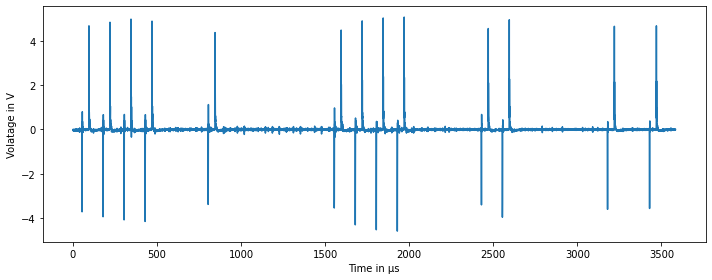

In [66]:
df_device_1 = pd.read_csv(str(file_name_dict_3['Device_3'][48]))
df_device_1.columns = ['time', 'voltage']
voltage_diff = df_device_1['voltage'].diff()
# tick_spacing = 1
plt.figure(100,figsize=(10,4))
plt.plot(df_device_1['time'], voltage_diff)

# plt.yticks(np.arange(min(voltage_diff), max(voltage_diff), 1.0))

plt.xlabel('Time in μs')
plt.ylabel('Volatage in V')
plt.tight_layout()

In [67]:
voltage_diff_list= voltage_diff[(voltage_diff.values) > 2.4]
# print(voltage_diff_list)
# min(voltage_diff_list)
print('Minimum value',(voltage_diff_list.min()))

Minimum value 4.369780219780218


In [68]:
# plt.plot(voltage_diff[4970:5000])

In [69]:
def file_diff_plot(file_name):
    df_device_1 = pd.read_csv(file_name)
    df_device_1.columns = ['time', 'voltage']
    df_device_1['MA'] = df_device_1['voltage'].rolling(10,min_periods=0).mean()# moving average
    df_device_1= df_device_1.drop('voltage',axis=1)
    df_device_1.rename(columns={'MA':'voltage'},inplace=True)
    diff_2 = df_device_1['voltage'].diff()
    plt.figure(100,figsize=(10,5))
    plt.plot(df_device_1['time'], diff_2)
    plt.yticks(np.arange(round(diff_2.min(),2), round(diff_2.max(),2), 0.5))
    plt.xlabel('Time in μs')
    plt.ylabel('Volatage in V')
    plt.tight_layout()
    return (f' Max difference {diff_2.max()}, Average {diff_2.mean()}' )

### Plot

' Max difference 1.2765422771672768, Average 0.000519098971118644'

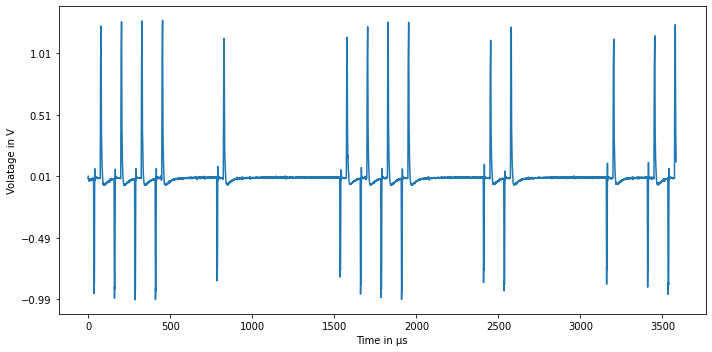

In [70]:
#Device_1
file_diff_plot(str(file_name_dict_3['Device_1'][48]))

' Max difference 1.2876690323565292, Average 0.00030160807538894485'

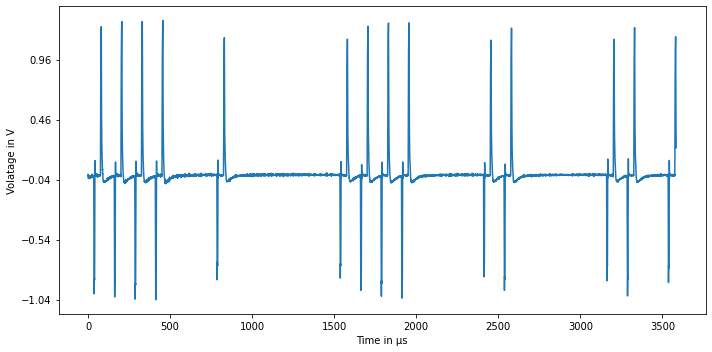

In [71]:
#Device_2
file_diff_plot(str(file_name_dict_3['Device_2'][99]))

' Max difference 1.2219200244200294, Average -0.0004951058158467116'

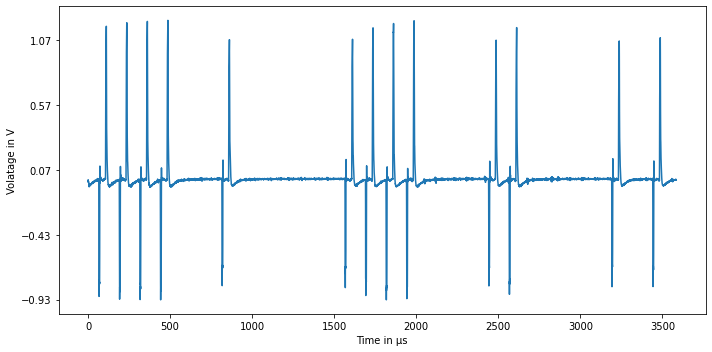

In [72]:
#Device_3
file_diff_plot(str(file_name_dict_3['Device_3'][55]))

' Max difference 1.1935973748473714, Average -0.00015623778168252946'

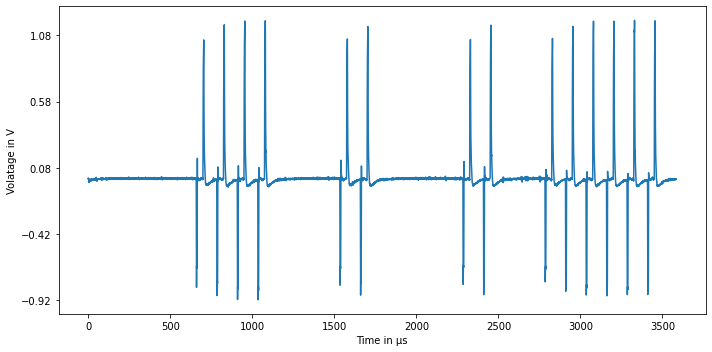

In [73]:
#Device_4
file_diff_plot(str(file_name_dict_3['Device_4'][75]))

' Max difference 1.2087702228327188, Average -0.0006821112907603072'

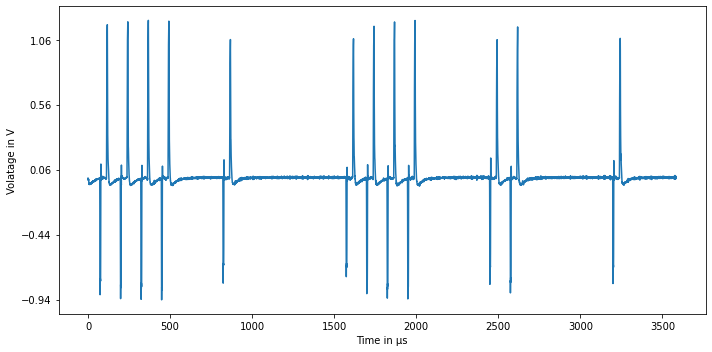

In [74]:
#Device_5
file_diff_plot(str(file_name_dict_3['Device_5'][85]))

' Max difference 1.182470619658119, Average -0.0015358442098186759'

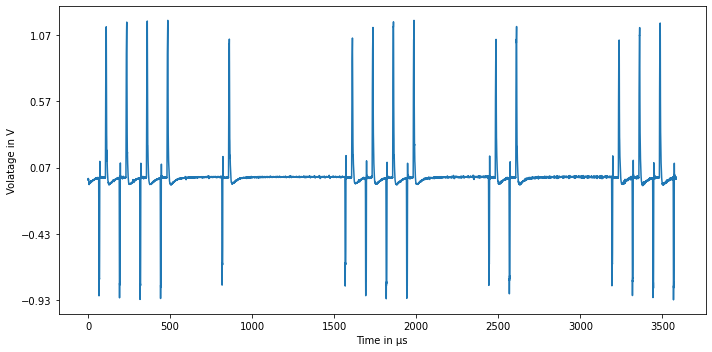

In [75]:
#Device_6
file_diff_plot(str(file_name_dict_3['Device_6'][96]))

### Find minimum voltage difference

In [76]:
min_volt_diff_list = []
for c_file in file_name_dict_3['Device_4']:
#     print('File:', str(c_file))
    c_file_df = pd.read_csv(str(c_file))
    c_file_df.columns = ['time', 'voltage']
    volt_diff= c_file_df['voltage'].diff()
    min_volt_diff= volt_diff[(volt_diff.values)>2].min()
    min_volt_diff_list.append(min_volt_diff)

# print(min_volt_diff_list)
print('Minimum voltage difference in all files: ',min(min_volt_diff_list))
    

Minimum voltage difference in all files:  2.0028159340659215


#### Function

In [77]:
def min_volt_diff(device,thresh_val):
    min_volt_diff_list = []
    max_diff_list= []
    for c_file in file_name_dict_3[device]:
        c_file_df = pd.read_csv(str(c_file))
        c_file_df.columns = ['time', 'voltage']
        volt_diff= c_file_df['voltage'].diff()
        min_volt_diff= volt_diff[(volt_diff.values)>thresh_val].min()
        min_volt_diff_list.append(min_volt_diff)
        
        max_diff= volt_diff.max()
        max_diff_list.append(max_diff)

    print('Minimum voltage difference in all files: ',min(min_volt_diff_list))
    print(f'Average of maximum voltage dfference in all files: {sum(max_diff_list)/len(max_diff_list)}')

In [78]:
#Device_1
min_volt_diff('Device_1', 2.5)

Minimum voltage difference in all files:  2.5085775335775224
Average of maximum voltage dfference in all files: 3.0538492292429806


In [79]:
#Device_2
min_volt_diff('Device_2', 2.5)

Minimum voltage difference in all files:  2.5085775335775224
Average of maximum voltage dfference in all files: 4251.482197378185


In [80]:
#Device_3
min_volt_diff('Device_3', 3)

Minimum voltage difference in all files:  3.004223901098893
Average of maximum voltage dfference in all files: 4.672873031135532


In [81]:
#Device_4
min_volt_diff('Device_4', 3)

Minimum voltage difference in all files:  3.0042239010988965
Average of maximum voltage dfference in all files: 4.82881956272404


In [82]:
#Device_5
min_volt_diff('Device_5', 3.4)

Minimum voltage difference in all files:  3.4088331807081715
Average of maximum voltage dfference in all files: 4.699637934981681


In [83]:
#Device_6
min_volt_diff('Device_6', 3.8)

Minimum voltage difference in all files:  3.8033272283272197
Average of maximum voltage dfference in all files: 4.619828754578756


### Read files and overview

In [84]:

df_lst_500 = []   #uncompressed
for csv_file in file_name_dict_3['Device_2']:
#     for file_num in range (len(file_name_dict_3['Device_2'])):
# #         print(file_num,': ',str(csv_file))
    csv_file_df = pd.read_csv(str(csv_file))
    csv_file_df.columns = ['time', 'voltage']

    threshold = csv_file_df['voltage'].diff().gt(2.5)
    group = (threshold&~threshold.shift(fill_value=False)).cumsum().add(1)
    time= lambda i: i['time'].groupby(group).apply(lambda j: j- j.iloc[0])
    df_2 = (csv_file_df.assign(bit=group,time=time).pivot(index='bit', columns='time', values='voltage'))

    df_3 = df_2.copy()
    df_3.reset_index(drop=True, inplace=True)
    df_3 = df_3.rename_axis(None, axis=1)
    df_lst_500.append(df_3)

#Min and max non blank values in columns of each csv file of a selected device folder
#Min and max bits found in all measurement

df_lst_500_describe = []
max_voltage_list = []
for j in range(len(df_lst_500)):
    desc = df_lst_500[j].apply(pd.DataFrame.describe, axis= 1)
    df_lst_500_describe.append(desc)

    max_voltage= df_lst_500[j].stack().max()
#     print(f'{j+1}: ','Max voltage: ',max_voltage)
    max_voltage_list.append(max_voltage)

bits_count_list = []
min_value_count_list = []
max_value_count_list = []

for k in range(len(df_lst_500_describe)):
    min_cols = df_lst_500_describe[k]['count'].min()
    print (f'{k+1}: ','Min count',min_cols)

    min_value_count_list.append(min_cols)

    max_cols = df_lst_500_describe[k]['count'].max()
    max_value_count_list.append(max_cols)

    index_min_count = df_lst_500[k].apply(pd.DataFrame.describe, axis= 1)['count'].idxmin()+1 # index number which has less values
    maximum_bits = df_lst_500_describe[k]['count'].last_valid_index()+1 #Max bits found in one measurement/csv file

    if maximum_bits<14:
        print('*******File Number: ',f'{k+1}: ', 'bits', maximum_bits,'////////********')
    bits_count_list.append(maximum_bits)

    if min_cols<100: # and index_min_count<14
        print('-----Idx num containing least count----- :',index_min_count)

#         print (f'{k+1}: ','Min count',min_cols)#, end =', Max count: ')
#         print (max_cols)




print('')
print('Max Voltage value among all measurements: ', max(max_voltage_list))
print('')     
print('Number of minimum bits/waveform :', min(bits_count_list))
print('Number of maximum bits/waveform :', max(bits_count_list))
print('')
print('Min count of voltage values in a bit:', min(min_value_count_list))
print('Max count of voltage value in a bit:', max(max_value_count_list))

1:  Max voltage:  35.27181394993895
2:  Max voltage:  35.28192918192918
3:  Max voltage:  35.29204441391941
4:  Max voltage:  35.29204441391941
5:  Max voltage:  35.30215964590965
6:  Max voltage:  35.3527358058608
7:  Max voltage:  35.30215964590965
8:  Max voltage:  35.28192918192918
9:  Max voltage:  35.28192918192918
10:  Max voltage:  35.33250534188034
11:  Max voltage:  35.27181394993895
12:  Max voltage:  35.28192918192918
13:  Max voltage:  35.27181394993895
14:  Max voltage:  35.34262057387057
15:  Max voltage:  35.27181394993895
16:  Max voltage:  35.32239010989011
17:  Max voltage:  35.30215964590965
18:  Max voltage:  35.30215964590965
19:  Max voltage:  35.28192918192918
20:  Max voltage:  35.30215964590965
21:  Max voltage:  35.28192918192918
22:  Max voltage:  35.312274877899874
23:  Max voltage:  35.3527358058608
24:  Max voltage:  35.27181394993895
25:  Max voltage:  35.30215964590965
26:  Max voltage:  35.30215964590965
27:  Max voltage:  35.29204441391941
28:  Max vo

227:  Max voltage:  35.28192918192918
228:  Max voltage:  35.27181394993895
229:  Max voltage:  35.29204441391941
230:  Max voltage:  35.32239010989011
231:  Max voltage:  35.29204441391941
232:  Max voltage:  35.26169871794872
233:  Max voltage:  35.28192918192918
234:  Max voltage:  35.33250534188034
235:  Max voltage:  35.28192918192918
236:  Max voltage:  35.28192918192918
237:  Max voltage:  35.29204441391941
238:  Max voltage:  35.33250534188034
239:  Max voltage:  35.28192918192918
240:  Max voltage:  35.30215964590965
241:  Max voltage:  35.29204441391941
242:  Max voltage:  35.29204441391941
243:  Max voltage:  35.30215964590965
244:  Max voltage:  35.30215964590965
245:  Max voltage:  35.36285103785104
246:  Max voltage:  35.28192918192918
247:  Max voltage:  35.30215964590965
248:  Max voltage:  35.29204441391941
249:  Max voltage:  35.29204441391941
250:  Max voltage:  35.312274877899874
251:  Max voltage:  35.29204441391941
252:  Max voltage:  35.30215964590965
253:  Max v

449:  Max voltage:  35.27181394993895
450:  Max voltage:  35.32239010989011
451:  Max voltage:  35.312274877899874
452:  Max voltage:  35.34262057387057
453:  Max voltage:  35.312274877899874
454:  Max voltage:  35.3527358058608
455:  Max voltage:  35.29204441391941
456:  Max voltage:  35.312274877899874
457:  Max voltage:  35.29204441391941
458:  Max voltage:  35.27181394993895
459:  Max voltage:  35.29204441391941
460:  Max voltage:  35.27181394993895
461:  Max voltage:  35.312274877899874
462:  Max voltage:  35.32239010989011
463:  Max voltage:  35.29204441391941
464:  Max voltage:  35.29204441391941
465:  Max voltage:  35.30215964590965
466:  Max voltage:  35.312274877899874
467:  Max voltage:  35.30215964590965
468:  Max voltage:  35.30215964590965
469:  Max voltage:  35.29204441391941
470:  Max voltage:  35.32239010989011
471:  Max voltage:  35.32239010989011
472:  Max voltage:  35.34262057387057
473:  Max voltage:  35.30215964590965
474:  Max voltage:  35.30215964590965
475:  Ma

166:  Min count 26.0
-----Idx num containing least count----- : 15
167:  Min count 219.0
168:  Min count 203.0
169:  Min count 22.0
-----Idx num containing least count----- : 15
170:  Min count 193.0
171:  Min count 227.0
172:  Min count 215.0
173:  Min count 209.0
174:  Min count 28.0
-----Idx num containing least count----- : 15
175:  Min count 30.0
-----Idx num containing least count----- : 15
176:  Min count 17.0
-----Idx num containing least count----- : 15
177:  Min count 192.0
178:  Min count 11.0
-----Idx num containing least count----- : 15
179:  Min count 186.0
180:  Min count 24.0
-----Idx num containing least count----- : 15
181:  Min count 176.0
182:  Min count 216.0
183:  Min count 28.0
-----Idx num containing least count----- : 15
184:  Min count 1.0
-----Idx num containing least count----- : 15
185:  Min count 6.0
-----Idx num containing least count----- : 15
186:  Min count 19.0
-----Idx num containing least count----- : 15
187:  Min count 215.0
188:  Min count 213.0
1

388:  Min count 183.0
389:  Min count 190.0
390:  Min count 29.0
-----Idx num containing least count----- : 15
391:  Min count 226.0
392:  Min count 218.0
393:  Min count 169.0
394:  Min count 1.0
-----Idx num containing least count----- : 15
395:  Min count 174.0
396:  Min count 8.0
-----Idx num containing least count----- : 15
397:  Min count 250.0
398:  Min count 28.0
-----Idx num containing least count----- : 15
399:  Min count 26.0
-----Idx num containing least count----- : 15
400:  Min count 17.0
-----Idx num containing least count----- : 15
401:  Min count 15.0
-----Idx num containing least count----- : 15
402:  Min count 13.0
-----Idx num containing least count----- : 15
403:  Min count 197.0
404:  Min count 29.0
-----Idx num containing least count----- : 15
405:  Min count 30.0
-----Idx num containing least count----- : 15
406:  Min count 194.0
407:  Min count 17.0
-----Idx num containing least count----- : 15
408:  Min count 189.0
409:  Min count 28.0
-----Idx num containing 

In [85]:
# for a in range(len(file_name_dict_3['Device_2'])):
#     print(a,': ',str(csv_file))

### Function

In [86]:
def df_overview_500(device, thresh):
    df_lst_500 = []   #uncompressed
    for csv_file in file_name_dict_3[device]:
#         print(str(csv_file))
        csv_file_df = pd.read_csv(str(csv_file))
        csv_file_df.columns = ['time', 'voltage']

        threshold = csv_file_df['voltage'].diff().gt(thresh)
        group = (threshold&~threshold.shift(fill_value=False)).cumsum().add(1)
        time= lambda i: i['time'].groupby(group).apply(lambda j: j- j.iloc[0])
        df_2 = (csv_file_df.assign(bit=group,time=time).pivot(index='bit', columns='time', values='voltage'))

        df_3 = df_2.copy()
        df_3.reset_index(drop=True, inplace=True)
        df_3 = df_3.rename_axis(None, axis=1)
        df_lst_500.append(df_3)

#Min and max non blank values in columns of each csv file of a selected device folder
#Min and max bits found in all measurement

    df_lst_500_describe = []
    max_voltage_list = []
    for j in range(len(df_lst_500)):
        desc = df_lst_500[j].apply(pd.DataFrame.describe, axis= 1)
        df_lst_500_describe.append(desc)
        
        max_voltage= df_lst_500[j].stack().max()
        max_voltage_list.append(max_voltage)

    bits_count_list = []
    min_value_count_list = []
    max_value_count_list = []

    for k in range(len(df_lst_500_describe)):
        min_cols = df_lst_500_describe[k]['count'].min()
        print (f'{k+1}: ','Min count',min_cols)

        min_value_count_list.append(min_cols)

        max_cols = df_lst_500_describe[k]['count'].max()
        max_value_count_list.append(max_cols)

        index_min_count = df_lst_500[k].apply(pd.DataFrame.describe, axis= 1)['count'].idxmin()+1 # index number which has less values
        maximum_bits = df_lst_500_describe[k]['count'].last_valid_index()+1 #Max bits found in one measurement/csv file
        
        if maximum_bits<14:
            print('*******File Number: ',f'{k+1}: ', 'bits', maximum_bits,'********////////')
        bits_count_list.append(maximum_bits)
        
        if min_cols<100: # and index_min_count<14
            print('-----Idx num containing least count----- :',index_min_count)

#         print (f'{k+1}: ','Min count',min_cols)#, end =', Max count: ')
#         print (max_cols)


        

    print('')
    print('Max Voltage value among all measurements: ', max(max_voltage_list))
    print('')     
    print('Number of minimum bits/waveform :', min(bits_count_list))
    print('Number of maximum bits/waveform :', max(bits_count_list))
    print('')
    print('Min count of voltage values in a bit:', min(min_value_count_list))
    print('Max count of voltage value in a bit:', max(max_value_count_list))

#### Device_1

In [87]:
df_overview_500('Device_1',2.5)

1:  Min count 206.0
2:  Min count 24.0
-----Idx num containing least count----- : 15
3:  Min count 202.0
4:  Min count 18.0
-----Idx num containing least count----- : 15
5:  Min count 27.0
-----Idx num containing least count----- : 15
6:  Min count 11.0
-----Idx num containing least count----- : 15
7:  Min count 249.0
8:  Min count 193.0
9:  Min count 8.0
-----Idx num containing least count----- : 15
10:  Min count 172.0
11:  Min count 1.0
-----Idx num containing least count----- : 15
12:  Min count 250.0
13:  Min count 28.0
-----Idx num containing least count----- : 15
14:  Min count 28.0
-----Idx num containing least count----- : 15
15:  Min count 18.0
-----Idx num containing least count----- : 15
16:  Min count 207.0
17:  Min count 190.0
18:  Min count 186.0
19:  Min count 192.0
20:  Min count 200.0
21:  Min count 207.0
22:  Min count 177.0
23:  Min count 27.0
-----Idx num containing least count----- : 15
24:  Min count 178.0
25:  Min count 250.0
26:  Min count 191.0
27:  Min count 

-----Idx num containing least count----- : 15
222:  Min count 28.0
-----Idx num containing least count----- : 15
223:  Min count 199.0
224:  Min count 191.0
225:  Min count 197.0
226:  Min count 21.0
-----Idx num containing least count----- : 15
227:  Min count 173.0
228:  Min count 185.0
229:  Min count 182.0
230:  Min count 197.0
231:  Min count 27.0
-----Idx num containing least count----- : 15
232:  Min count 194.0
233:  Min count 1.0
-----Idx num containing least count----- : 15
234:  Min count 201.0
235:  Min count 13.0
-----Idx num containing least count----- : 15
236:  Min count 18.0
-----Idx num containing least count----- : 15
237:  Min count 197.0
238:  Min count 185.0
239:  Min count 198.0
240:  Min count 194.0
241:  Min count 191.0
242:  Min count 192.0
243:  Min count 15.0
-----Idx num containing least count----- : 15
244:  Min count 20.0
-----Idx num containing least count----- : 15
245:  Min count 9.0
-----Idx num containing least count----- : 15
246:  Min count 2.0
---

433:  Min count 196.0
434:  Min count 6.0
-----Idx num containing least count----- : 15
435:  Min count 191.0
436:  Min count 29.0
-----Idx num containing least count----- : 15
437:  Min count 27.0
-----Idx num containing least count----- : 15
438:  Min count 192.0
439:  Min count 171.0
440:  Min count 16.0
-----Idx num containing least count----- : 15
441:  Min count 181.0
442:  Min count 28.0
-----Idx num containing least count----- : 15
443:  Min count 199.0
444:  Min count 173.0
445:  Min count 25.0
-----Idx num containing least count----- : 15
446:  Min count 175.0
447:  Min count 195.0
448:  Min count 200.0
449:  Min count 208.0
450:  Min count 207.0
451:  Min count 26.0
-----Idx num containing least count----- : 15
452:  Min count 250.0
453:  Min count 6.0
-----Idx num containing least count----- : 15
454:  Min count 29.0
-----Idx num containing least count----- : 15
455:  Min count 200.0
456:  Min count 5.0
-----Idx num containing least count----- : 15
457:  Min count 27.0
----

#### Device_2

In [88]:
df_overview_500('Device_2',2.5)

1:  Min count 199.0
2:  Min count 180.0
3:  Min count 201.0
4:  Min count 22.0
-----Idx num containing least count----- : 15
5:  Min count 227.0
6:  Min count 249.0
7:  Min count 21.0
-----Idx num containing least count----- : 15
8:  Min count 207.0
9:  Min count 222.0
10:  Min count 187.0
11:  Min count 223.0
12:  Min count 191.0
13:  Min count 30.0
-----Idx num containing least count----- : 15
14:  Min count 180.0
15:  Min count 8.0
-----Idx num containing least count----- : 15
16:  Min count 205.0
17:  Min count 186.0
18:  Min count 173.0
19:  Min count 222.0
20:  Min count 12.0
-----Idx num containing least count----- : 15
21:  Min count 183.0
22:  Min count 181.0
23:  Min count 249.0
24:  Min count 182.0
25:  Min count 178.0
26:  Min count 27.0
-----Idx num containing least count----- : 15
27:  Min count 29.0
-----Idx num containing least count----- : 15
28:  Min count 27.0
-----Idx num containing least count----- : 15
29:  Min count 204.0
30:  Min count 185.0
31:  Min count 173.0

214:  Min count 29.0
-----Idx num containing least count----- : 15
215:  Min count 30.0
-----Idx num containing least count----- : 15
216:  Min count 217.0
217:  Min count 8.0
-----Idx num containing least count----- : 15
218:  Min count 27.0
-----Idx num containing least count----- : 15
219:  Min count 195.0
220:  Min count 27.0
-----Idx num containing least count----- : 15
221:  Min count 226.0
222:  Min count 171.0
223:  Min count 225.0
224:  Min count 228.0
225:  Min count 26.0
-----Idx num containing least count----- : 15
226:  Min count 16.0
-----Idx num containing least count----- : 15
227:  Min count 193.0
228:  Min count 198.0
229:  Min count 211.0
230:  Min count 250.0
231:  Min count 216.0
232:  Min count 171.0
233:  Min count 205.0
234:  Min count 29.0
-----Idx num containing least count----- : 15
235:  Min count 30.0
-----Idx num containing least count----- : 15
236:  Min count 27.0
-----Idx num containing least count----- : 15
237:  Min count 210.0
238:  Min count 197.0
2

432:  Min count 27.0
-----Idx num containing least count----- : 15
433:  Min count 22.0
-----Idx num containing least count----- : 15
434:  Min count 222.0
435:  Min count 28.0
-----Idx num containing least count----- : 15
436:  Min count 14.0
-----Idx num containing least count----- : 15
437:  Min count 223.0
438:  Min count 190.0
439:  Min count 226.0
440:  Min count 196.0
441:  Min count 213.0
442:  Min count 23.0
-----Idx num containing least count----- : 15
443:  Min count 169.0
444:  Min count 171.0
445:  Min count 196.0
446:  Min count 229.0
447:  Min count 225.0
448:  Min count 188.0
449:  Min count 195.0
450:  Min count 221.0
451:  Min count 210.0
452:  Min count 214.0
453:  Min count 176.0
454:  Min count 207.0
455:  Min count 199.0
456:  Min count 22.0
-----Idx num containing least count----- : 15
457:  Min count 222.0
458:  Min count 28.0
-----Idx num containing least count----- : 15
459:  Min count 212.0
460:  Min count 18.0
-----Idx num containing least count----- : 15
46

#### Device_3

In [89]:
df_overview_500('Device_3',3)

1:  Min count 180.0
2:  Min count 27.0
-----Idx num containing least count----- : 14
3:  Min count 146.0
4:  Min count 170.0
*******File Number:  4:  bits 12 ********////////
5:  Min count 182.0
6:  Min count 191.0
7:  Min count 25.0
*******File Number:  7:  bits 11 ********////////
-----Idx num containing least count----- : 11
8:  Min count 227.0
*******File Number:  8:  bits 12 ********////////
9:  Min count 182.0
10:  Min count 159.0
11:  Min count 188.0
*******File Number:  11:  bits 12 ********////////
12:  Min count 170.0
13:  Min count 194.0
14:  Min count 190.0
15:  Min count 202.0
*******File Number:  15:  bits 12 ********////////
16:  Min count 25.0
-----Idx num containing least count----- : 14
17:  Min count 197.0
18:  Min count 201.0
19:  Min count 185.0
20:  Min count 207.0
*******File Number:  20:  bits 12 ********////////
21:  Min count 184.0
22:  Min count 204.0
23:  Min count 28.0
-----Idx num containing least count----- : 14
24:  Min count 160.0
25:  Min count 176.0
2

217:  Min count 184.0
218:  Min count 191.0
219:  Min count 177.0
220:  Min count 25.0
-----Idx num containing least count----- : 14
221:  Min count 27.0
-----Idx num containing least count----- : 14
222:  Min count 195.0
223:  Min count 165.0
224:  Min count 184.0
225:  Min count 189.0
226:  Min count 182.0
*******File Number:  226:  bits 12 ********////////
227:  Min count 155.0
228:  Min count 201.0
229:  Min count 205.0
230:  Min count 190.0
231:  Min count 192.0
232:  Min count 193.0
233:  Min count 195.0
234:  Min count 145.0
235:  Min count 195.0
236:  Min count 172.0
237:  Min count 26.0
-----Idx num containing least count----- : 14
238:  Min count 196.0
*******File Number:  238:  bits 12 ********////////
239:  Min count 186.0
240:  Min count 250.0
241:  Min count 190.0
242:  Min count 189.0
*******File Number:  242:  bits 12 ********////////
243:  Min count 196.0
244:  Min count 202.0
245:  Min count 197.0
246:  Min count 194.0
247:  Min count 180.0
248:  Min count 190.0
249: 

442:  Min count 200.0
443:  Min count 158.0
444:  Min count 188.0
*******File Number:  444:  bits 13 ********////////
445:  Min count 179.0
446:  Min count 176.0
447:  Min count 142.0
448:  Min count 208.0
449:  Min count 161.0
450:  Min count 27.0
-----Idx num containing least count----- : 14
451:  Min count 194.0
452:  Min count 153.0
453:  Min count 197.0
454:  Min count 26.0
-----Idx num containing least count----- : 14
455:  Min count 192.0
456:  Min count 26.0
-----Idx num containing least count----- : 14
457:  Min count 26.0
-----Idx num containing least count----- : 14
458:  Min count 196.0
459:  Min count 208.0
460:  Min count 153.0
461:  Min count 193.0
462:  Min count 142.0
*******File Number:  462:  bits 12 ********////////
463:  Min count 169.0
464:  Min count 198.0
465:  Min count 194.0
466:  Min count 160.0
*******File Number:  466:  bits 13 ********////////
467:  Min count 193.0
468:  Min count 190.0
469:  Min count 162.0
470:  Min count 24.0
-----Idx num containing lea

#### Device_4

In [90]:
df_overview_500('Device_4',3)

1:  Min count 197.0
2:  Min count 27.0
-----Idx num containing least count----- : 14
3:  Min count 223.0
4:  Min count 154.0
5:  Min count 176.0
6:  Min count 182.0
7:  Min count 230.0
*******File Number:  7:  bits 13 ********////////
8:  Min count 211.0
9:  Min count 165.0
10:  Min count 205.0
11:  Min count 28.0
-----Idx num containing least count----- : 14
12:  Min count 209.0
13:  Min count 211.0
*******File Number:  13:  bits 13 ********////////
14:  Min count 197.0
15:  Min count 201.0
*******File Number:  15:  bits 12 ********////////
16:  Min count 27.0
-----Idx num containing least count----- : 14
17:  Min count 223.0
18:  Min count 203.0
19:  Min count 214.0
20:  Min count 150.0
21:  Min count 210.0
22:  Min count 217.0
23:  Min count 151.0
24:  Min count 167.0
*******File Number:  24:  bits 13 ********////////
25:  Min count 169.0
26:  Min count 208.0
*******File Number:  26:  bits 13 ********////////
27:  Min count 225.0
28:  Min count 25.0
-----Idx num containing least cou

214:  Min count 142.0
215:  Min count 160.0
216:  Min count 187.0
217:  Min count 224.0
218:  Min count 203.0
219:  Min count 155.0
220:  Min count 170.0
*******File Number:  220:  bits 13 ********////////
221:  Min count 227.0
222:  Min count 217.0
223:  Min count 27.0
-----Idx num containing least count----- : 14
224:  Min count 139.0
*******File Number:  224:  bits 12 ********////////
225:  Min count 187.0
226:  Min count 149.0
227:  Min count 154.0
228:  Min count 210.0
229:  Min count 167.0
230:  Min count 166.0
231:  Min count 186.0
*******File Number:  231:  bits 12 ********////////
232:  Min count 24.0
*******File Number:  232:  bits 11 ********////////
-----Idx num containing least count----- : 11
233:  Min count 223.0
234:  Min count 194.0
235:  Min count 213.0
*******File Number:  235:  bits 11 ********////////
236:  Min count 229.0
237:  Min count 215.0
238:  Min count 250.0
239:  Min count 206.0
240:  Min count 250.0
241:  Min count 215.0
242:  Min count 187.0
243:  Min co

430:  Min count 200.0
431:  Min count 149.0
432:  Min count 212.0
433:  Min count 223.0
434:  Min count 212.0
*******File Number:  434:  bits 12 ********////////
435:  Min count 24.0
*******File Number:  435:  bits 13 ********////////
-----Idx num containing least count----- : 13
436:  Min count 193.0
437:  Min count 199.0
438:  Min count 150.0
439:  Min count 25.0
-----Idx num containing least count----- : 14
440:  Min count 250.0
441:  Min count 146.0
442:  Min count 27.0
*******File Number:  442:  bits 12 ********////////
-----Idx num containing least count----- : 12
443:  Min count 171.0
*******File Number:  443:  bits 13 ********////////
444:  Min count 193.0
445:  Min count 186.0
*******File Number:  445:  bits 11 ********////////
446:  Min count 157.0
447:  Min count 185.0
448:  Min count 194.0
449:  Min count 250.0
450:  Min count 27.0
-----Idx num containing least count----- : 14
451:  Min count 226.0
452:  Min count 225.0
453:  Min count 25.0
*******File Number:  453:  bits 1

#### Device_5

In [91]:
df_overview_500('Device_5',3.4)

1:  Min count 222.0
*******File Number:  1:  bits 13 ********////////
2:  Min count 220.0
*******File Number:  2:  bits 13 ********////////
3:  Min count 214.0
*******File Number:  3:  bits 13 ********////////
4:  Min count 161.0
*******File Number:  4:  bits 13 ********////////
5:  Min count 28.0
*******File Number:  5:  bits 13 ********////////
-----Idx num containing least count----- : 13
6:  Min count 162.0
*******File Number:  6:  bits 7 ********////////
7:  Min count 170.0
*******File Number:  7:  bits 13 ********////////
8:  Min count 222.0
*******File Number:  8:  bits 12 ********////////
9:  Min count 229.0
*******File Number:  9:  bits 7 ********////////
10:  Min count 28.0
*******File Number:  10:  bits 13 ********////////
-----Idx num containing least count----- : 13
11:  Min count 187.0
*******File Number:  11:  bits 13 ********////////
12:  Min count 250.0
*******File Number:  12:  bits 9 ********////////
13:  Min count 24.0
*******File Number:  13:  bits 12 ********/////

*******File Number:  119:  bits 9 ********////////
120:  Min count 208.0
*******File Number:  120:  bits 13 ********////////
121:  Min count 225.0
*******File Number:  121:  bits 12 ********////////
122:  Min count 226.0
*******File Number:  122:  bits 13 ********////////
123:  Min count 250.0
*******File Number:  123:  bits 11 ********////////
124:  Min count 229.0
*******File Number:  124:  bits 13 ********////////
125:  Min count 28.0
*******File Number:  125:  bits 13 ********////////
-----Idx num containing least count----- : 13
126:  Min count 250.0
*******File Number:  126:  bits 11 ********////////
127:  Min count 27.0
*******File Number:  127:  bits 13 ********////////
-----Idx num containing least count----- : 13
128:  Min count 207.0
*******File Number:  128:  bits 13 ********////////
129:  Min count 250.0
*******File Number:  129:  bits 8 ********////////
130:  Min count 250.0
*******File Number:  130:  bits 9 ********////////
131:  Min count 191.0
*******File Number:  131:

*******File Number:  225:  bits 7 ********////////
226:  Min count 141.0
*******File Number:  226:  bits 11 ********////////
227:  Min count 193.0
*******File Number:  227:  bits 11 ********////////
228:  Min count 154.0
*******File Number:  228:  bits 12 ********////////
229:  Min count 161.0
*******File Number:  229:  bits 8 ********////////
230:  Min count 250.0
*******File Number:  230:  bits 9 ********////////
231:  Min count 27.0
*******File Number:  231:  bits 13 ********////////
-----Idx num containing least count----- : 13
232:  Min count 144.0
*******File Number:  232:  bits 12 ********////////
233:  Min count 189.0
*******File Number:  233:  bits 6 ********////////
234:  Min count 250.0
*******File Number:  234:  bits 7 ********////////
235:  Min count 190.0
*******File Number:  235:  bits 13 ********////////
236:  Min count 250.0
*******File Number:  236:  bits 7 ********////////
237:  Min count 167.0
*******File Number:  237:  bits 13 ********////////
238:  Min count 204.0

*******File Number:  335:  bits 10 ********////////
336:  Min count 250.0
*******File Number:  336:  bits 11 ********////////
337:  Min count 207.0
*******File Number:  337:  bits 11 ********////////
338:  Min count 228.0
*******File Number:  338:  bits 12 ********////////
339:  Min count 192.0
*******File Number:  339:  bits 8 ********////////
340:  Min count 219.0
*******File Number:  340:  bits 11 ********////////
341:  Min count 250.0
*******File Number:  341:  bits 11 ********////////
342:  Min count 250.0
*******File Number:  342:  bits 8 ********////////
343:  Min count 197.0
*******File Number:  343:  bits 13 ********////////
344:  Min count 177.0
*******File Number:  344:  bits 13 ********////////
345:  Min count 207.0
*******File Number:  345:  bits 13 ********////////
346:  Min count 142.0
*******File Number:  346:  bits 6 ********////////
347:  Min count 165.0
*******File Number:  347:  bits 6 ********////////
348:  Min count 27.0
*******File Number:  348:  bits 13 ********

*******File Number:  444:  bits 13 ********////////
445:  Min count 25.0
*******File Number:  445:  bits 13 ********////////
-----Idx num containing least count----- : 13
446:  Min count 26.0
*******File Number:  446:  bits 13 ********////////
-----Idx num containing least count----- : 13
447:  Min count 227.0
*******File Number:  447:  bits 13 ********////////
448:  Min count 166.0
*******File Number:  448:  bits 11 ********////////
449:  Min count 28.0
*******File Number:  449:  bits 13 ********////////
-----Idx num containing least count----- : 13
450:  Min count 200.0
*******File Number:  450:  bits 8 ********////////
451:  Min count 165.0
*******File Number:  451:  bits 13 ********////////
452:  Min count 210.0
*******File Number:  452:  bits 13 ********////////
453:  Min count 223.0
*******File Number:  453:  bits 13 ********////////
454:  Min count 202.0
*******File Number:  454:  bits 13 ********////////
455:  Min count 25.0
*******File Number:  455:  bits 13 ********////////
-

#### Device_6

In [92]:
df_overview_500('Device_6',3.8)

1:  Min count 217.0
*******File Number:  1:  bits 3 ********////////
2:  Min count 208.0
3:  Min count 232.0
*******File Number:  3:  bits 8 ********////////
4:  Min count 209.0
*******File Number:  4:  bits 5 ********////////
5:  Min count 197.0
*******File Number:  5:  bits 6 ********////////
6:  Min count 3.0
-----Idx num containing least count----- : 16
7:  Min count 250.0
8:  Min count 21.0
-----Idx num containing least count----- : 16
9:  Min count 174.0
10:  Min count 238.0
*******File Number:  10:  bits 12 ********////////
11:  Min count 176.0
*******File Number:  11:  bits 10 ********////////
12:  Min count 189.0
13:  Min count 190.0
*******File Number:  13:  bits 8 ********////////
14:  Min count 193.0
*******File Number:  14:  bits 4 ********////////
15:  Min count 177.0
16:  Min count 191.0
17:  Min count 202.0
*******File Number:  17:  bits 12 ********////////
18:  Min count 6.0
-----Idx num containing least count----- : 16
19:  Min count 238.0
*******File Number:  19:  bi

*******File Number:  145:  bits 6 ********////////
146:  Min count 25.0
*******File Number:  146:  bits 7 ********////////
-----Idx num containing least count----- : 7
147:  Min count 176.0
*******File Number:  147:  bits 10 ********////////
148:  Min count 229.0
*******File Number:  148:  bits 3 ********////////
149:  Min count 25.0
-----Idx num containing least count----- : 15
150:  Min count 14.0
*******File Number:  150:  bits 4 ********////////
-----Idx num containing least count----- : 4
151:  Min count 12.0
*******File Number:  151:  bits 8 ********////////
-----Idx num containing least count----- : 8
152:  Min count 234.0
*******File Number:  152:  bits 7 ********////////
153:  Min count 182.0
*******File Number:  153:  bits 9 ********////////
154:  Min count 141.0
*******File Number:  154:  bits 9 ********////////
155:  Min count 209.0
*******File Number:  155:  bits 3 ********////////
156:  Min count 173.0
157:  Min count 192.0
158:  Min count 18.0
*******File Number:  158:  

-----Idx num containing least count----- : 16
285:  Min count 245.0
*******File Number:  285:  bits 6 ********////////
286:  Min count 194.0
287:  Min count 192.0
288:  Min count 249.0
*******File Number:  288:  bits 2 ********////////
289:  Min count 186.0
290:  Min count 24.0
*******File Number:  290:  bits 13 ********////////
-----Idx num containing least count----- : 13
291:  Min count 141.0
*******File Number:  291:  bits 6 ********////////
292:  Min count 141.0
*******File Number:  292:  bits 7 ********////////
293:  Min count 12.0
-----Idx num containing least count----- : 16
294:  Min count 196.0
295:  Min count 26.0
*******File Number:  295:  bits 13 ********////////
-----Idx num containing least count----- : 13
296:  Min count 185.0
297:  Min count 181.0
298:  Min count 9.0
-----Idx num containing least count----- : 16
299:  Min count 185.0
*******File Number:  299:  bits 13 ********////////
300:  Min count 210.0
*******File Number:  300:  bits 6 ********////////
301:  Min co

*******File Number:  422:  bits 5 ********////////
423:  Min count 209.0
424:  Min count 192.0
425:  Min count 200.0
*******File Number:  425:  bits 3 ********////////
426:  Min count 158.0
*******File Number:  426:  bits 9 ********////////
427:  Min count 193.0
*******File Number:  427:  bits 12 ********////////
428:  Min count 141.0
*******File Number:  428:  bits 11 ********////////
429:  Min count 191.0
*******File Number:  429:  bits 10 ********////////
430:  Min count 198.0
*******File Number:  430:  bits 5 ********////////
431:  Min count 168.0
432:  Min count 3.0
-----Idx num containing least count----- : 16
433:  Min count 208.0
*******File Number:  433:  bits 3 ********////////
434:  Min count 7.0
-----Idx num containing least count----- : 16
435:  Min count 24.0
-----Idx num containing least count----- : 16
436:  Min count 194.0
437:  Min count 27.0
-----Idx num containing least count----- : 15
438:  Min count 15.0
-----Idx num containing least count----- : 15
439:  Min coun

### saving splitted values to csv file

*********************

In [93]:
#Saving uncompressed files to uncompressed folder
for i in range (len(df_lst)):
        df_lst[i].to_csv('uncompressed/Device_4/3_8_6_3_8_6-{}.csv'.format(i+1))

In [94]:
#Saving compressed files to compressed folder
for j in range (len(df_compressed)):
        df_compressed[j].to_csv('compressed/Device_4/3_8_6_3_8_6-{}.csv'.format(j+1))

---------------------------------------------------------